In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.5/974.5 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 70.6MB/s]


In [ ]:
image = cv2.imread("/content/drive/MyDrive/images/persondog.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imwrite("persondog_gray.jpg", image)
results= model("persondog_gray.jpg")
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        conf = box.conf[0]
        cls = int(box.cls[0])

        print(f"Class: {cls}, Confidence: {conf:.2f}, BBox: ({x1}, {y1}, {x2}, {y2})")

result.save("output.jpg")



image 1/1 /content/persondog_gray.jpg: 448x640 2 persons, 1 dog, 231.2ms
Speed: 7.3ms preprocess, 231.2ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
Class: 0, Confidence: 0.93, BBox: (865.6488647460938, 223.77503967285156, 1160.6080322265625, 1015.247802734375)
Class: 0, Confidence: 0.91, BBox: (572.4967651367188, 168.87008666992188, 856.73291015625, 1009.930419921875)
Class: 16, Confidence: 0.91, BBox: (1261.4495849609375, 670.640625, 1534.609130859375, 1048.7369384765625)


'output.jpg'


image 1/1 /content/persondog_gray.jpg: 448x640 2 persons, 1 dog, 402.0ms
Speed: 14.3ms preprocess, 402.0ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)
Class: 0, Confidence: 0.93, BBox: (865, 223, 1160, 1015)
Class: 0, Confidence: 0.91, BBox: (572, 168, 856, 1009)
Class: 16, Confidence: 0.91, BBox: (1261, 670, 1534, 1048)


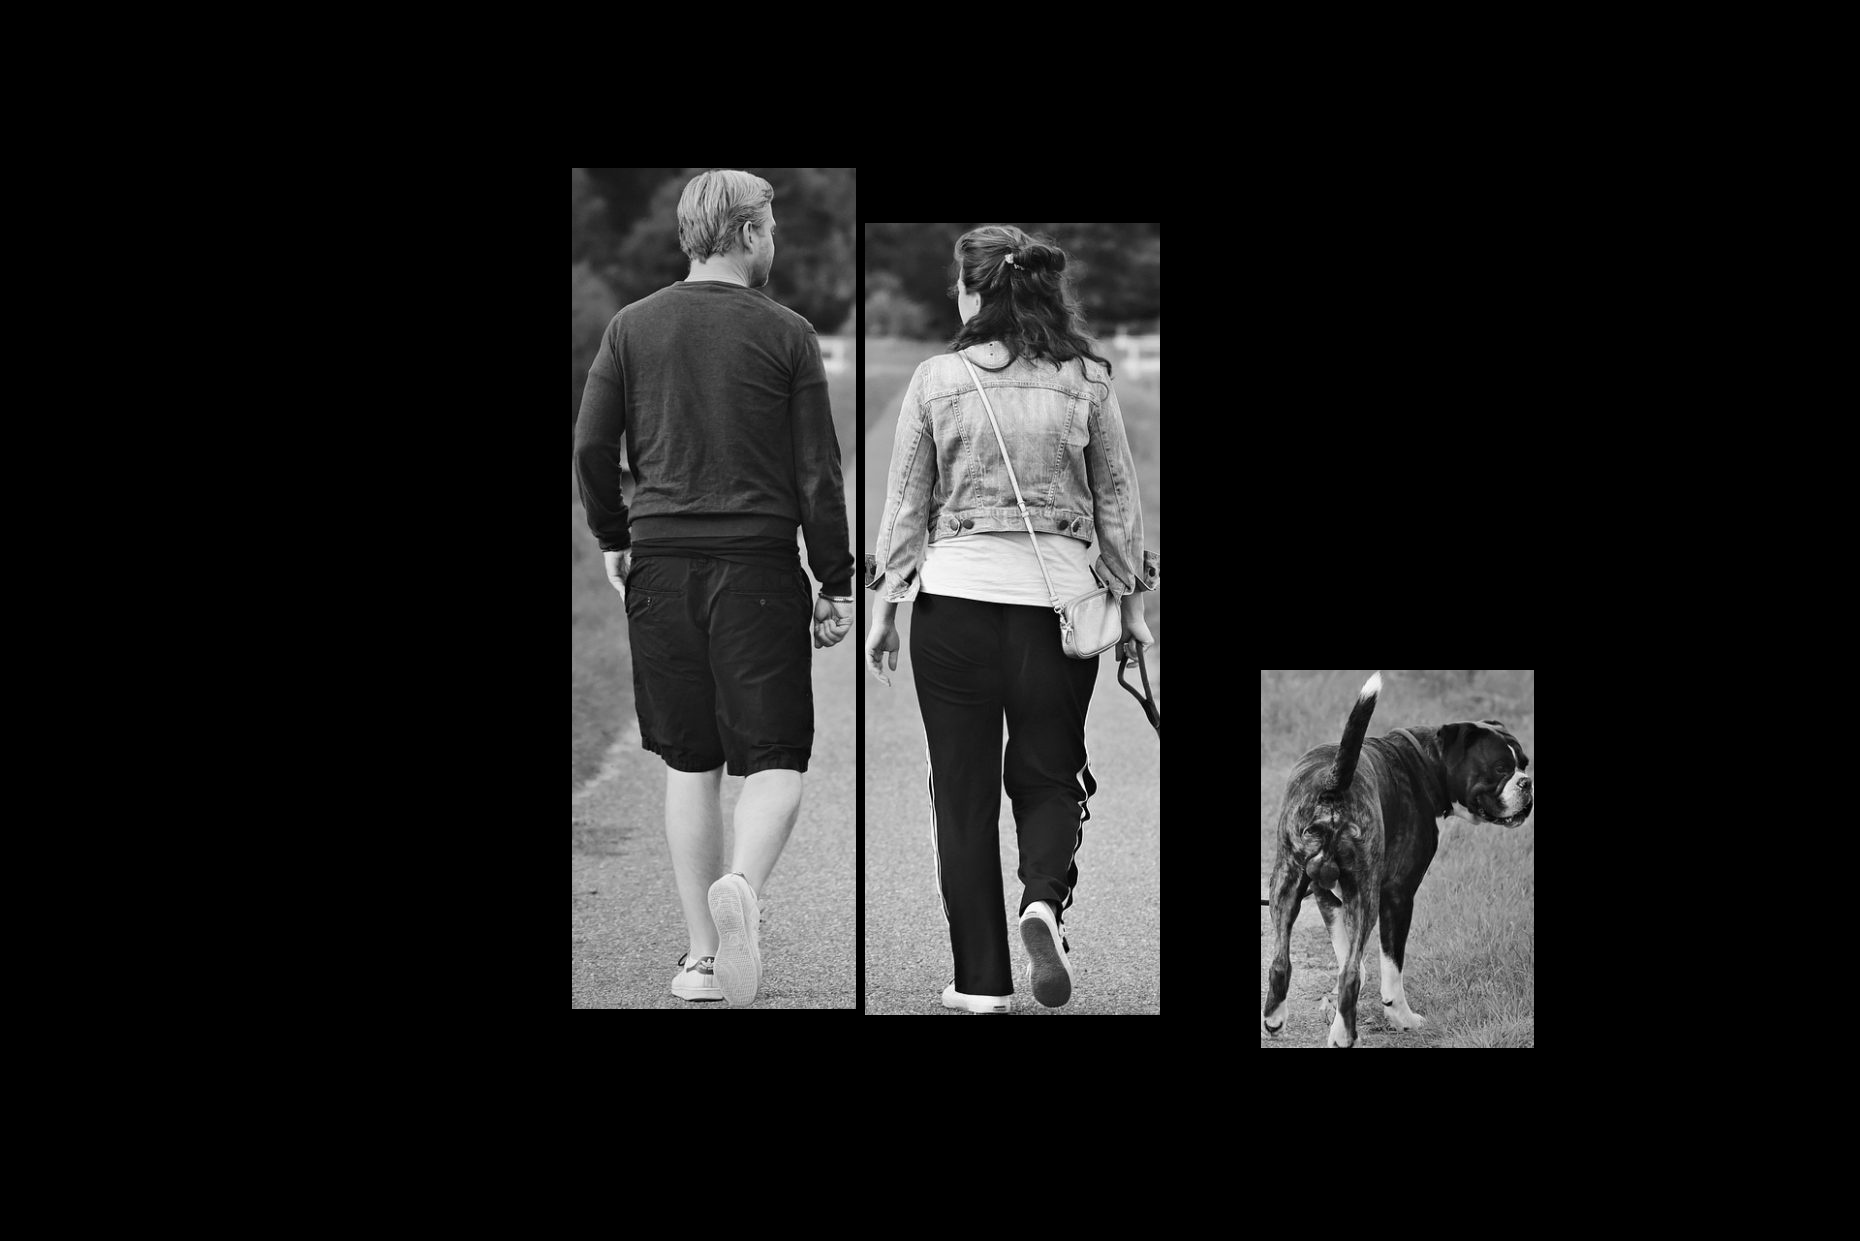

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Load the model
model = YOLO('yolov8n.pt') # Load the appropriate model
results = model("persondog_gray.jpg")

# Read the original image
image = cv2.imread("persondog_gray.jpg")
masked_image = np.zeros_like(image)  # Create a black image of the same size

for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
        conf = box.conf[0]  # Confidence
        cls = int(box.cls[0])  # Class

        print(f"Class: {cls}, Confidence: {conf:.2f}, BBox: ({x1}, {y1}, {x2}, {y2})")

        # Draw the mask
        masked_image[y1:y2, x1:x2] = image[y1:y2, x1:x2]  # Copy only the bbox area

# Save the output image
cv2.imwrite("output.jpg", masked_image)
cv2_imshow(masked_image) # Use cv2_imshow instead of cv2.imshow
#cv2.waitKey(0) # These lines are not needed with cv2_imshow
#cv2.destroyAllWindows()


image 1/1 /content/persondog_gray.jpg: 448x640 2 persons, 1 dog, 284.5ms
Speed: 5.6ms preprocess, 284.5ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)
Class: 0, Confidence: 0.93, BBox: (865, 223, 1160, 1015)
Class: 0, Confidence: 0.91, BBox: (572, 168, 856, 1009)
Class: 16, Confidence: 0.91, BBox: (1261, 670, 1534, 1048)


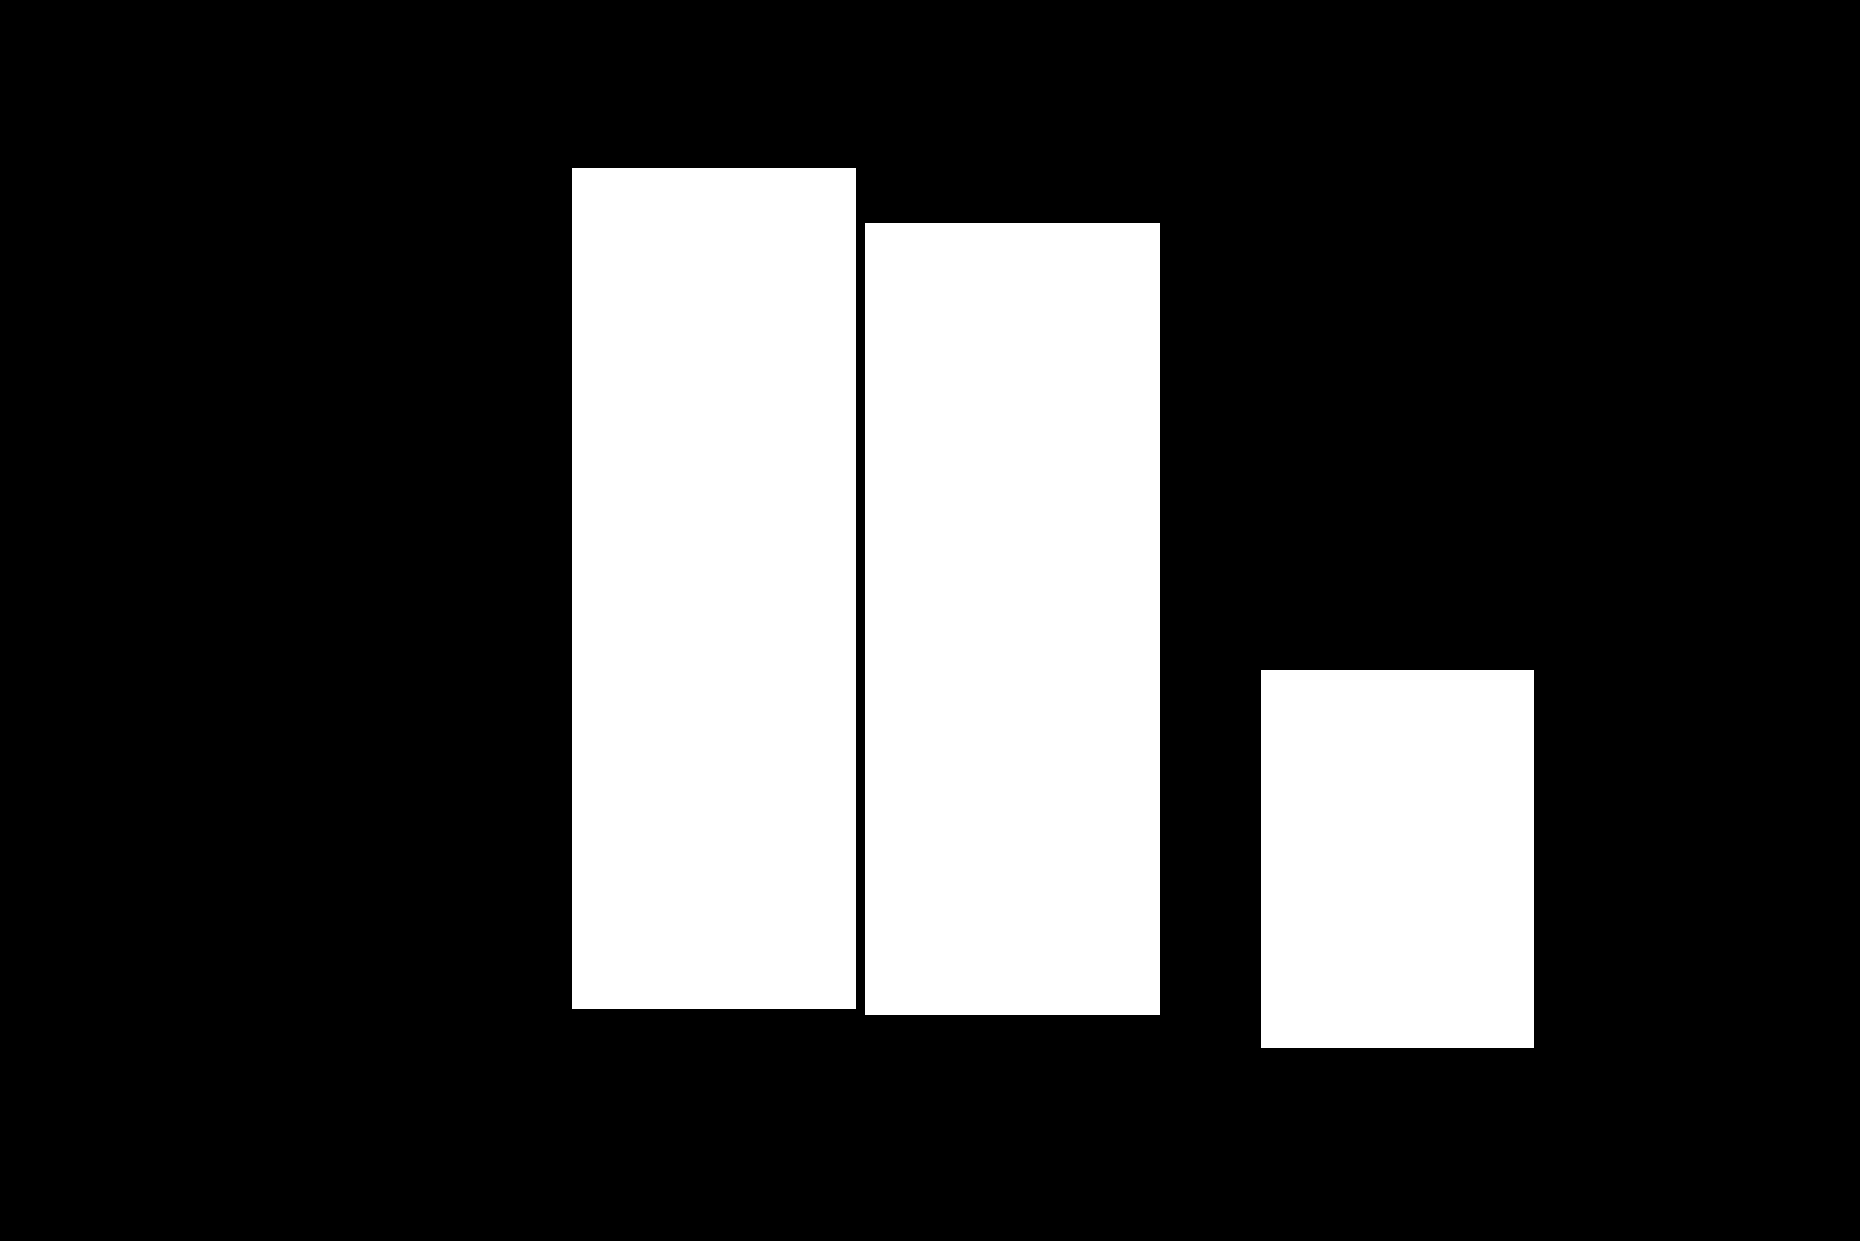

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Load the model
model = YOLO('yolov8n.pt')# Load the appropriate model
results = model("persondog_gray.jpg")

# Read the original image
image = cv2.imread("persondog_gray.jpg")
masked_image = np.zeros_like(image)  # Create a black image of the same size

for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
        conf = box.conf[0]  # Confidence
        cls = int(box.cls[0])  # Class

        print(f"Class: {cls}, Confidence: {conf:.2f}, BBox: ({x1}, {y1}, {x2}, {y2})")

        # Fill the bounding box with white
        masked_image[y1:y2, x1:x2] = (255, 255, 255)  # Set pixel values to white

# Save the output image
cv2.imwrite("output.jpg", masked_image)
cv2_imshow(masked_image) # Use cv2_imshow instead of cv2.imshow